In [2]:
import yt_idv
from importlib import resources
from pyaml import yaml
import pygraphviz
import matplotlib.pyplot as plt

In [5]:
import os 

sf = resources.path('yt_idv', 'shaders')  / 'shaderlist.yaml'
with open(sf, 'r') as fi: 
    shaderlist = yaml.safe_load(fi)


In [6]:
print(shaderlist['component_shaders'].keys())

dict_keys(['curve_rendering', 'multi_curve_rendering', 'block_rendering', 'octree_block_rendering', 'block_outline', 'grid_outline', 'box_outline', 'text_annotation', 'mesh_rendering', 'rgba_line_plot', 'rgba_display', 'sph_rendering', 'particle_rendering'])


In [7]:
shaderlist['component_shaders']['block_rendering']['max_intensity']

{'description': 'Maximum Intensity',
 'first_vertex': 'grid_position',
 'first_geometry': 'grid_expand',
 'first_fragment': 'max_intensity',
 'second_vertex': 'passthrough',
 'second_fragment': 'apply_colormap'}

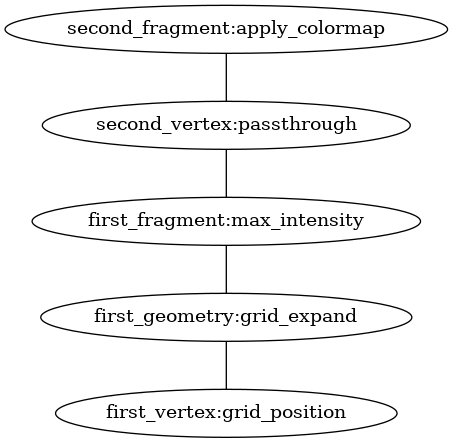

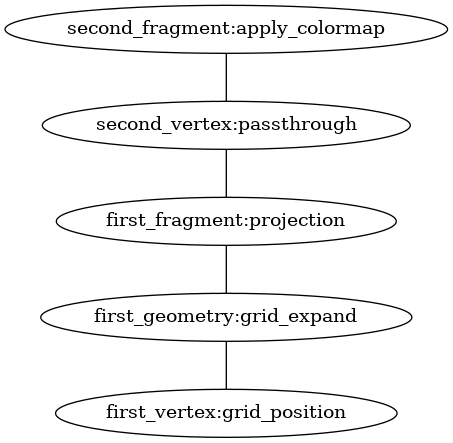

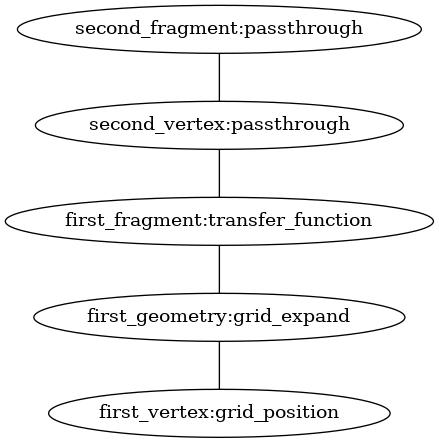

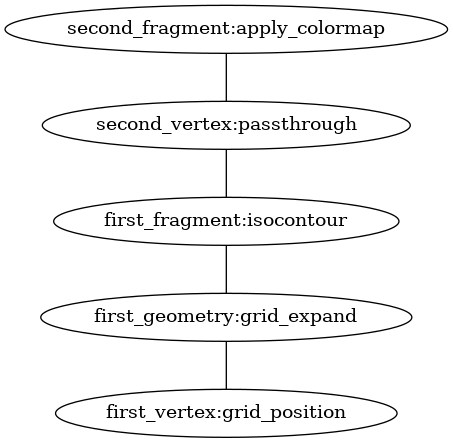

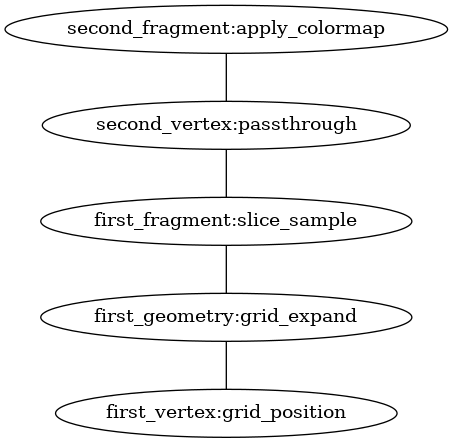

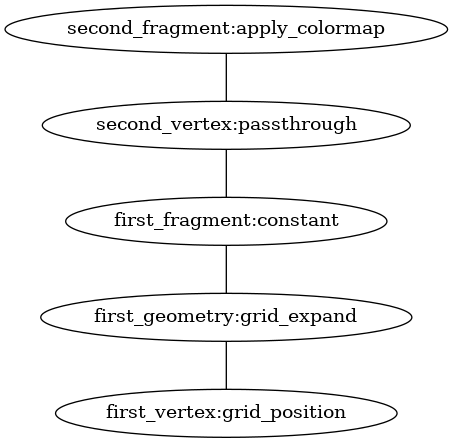

In [26]:

shds = shaderlist['component_shaders']['block_rendering'].keys()
for shd in shds:
    if 'default' in shd: 
        continue
        
    components_dict = shaderlist['component_shaders']['block_rendering'][shd]
    
    order = ['first_vertex', 
             'first_geometry',
             'first_fragment',         
             'second_vertex', 
             'second_fragment']
    
    
    pipeline = []
    edges = []
    for icomp, comp in enumerate(order):
        val = components_dict.get(comp, 'None') 
        nm =f"{comp}:{val}"
        if icomp > 0:
            edges.append((nm, pipeline[-1]))
        pipeline.append(nm)
        
    
    dig = pygraphviz.AGraph()
    dig.add_nodes_from(pipeline)
    dig.add_edges_from(edges)
    
    dig.layout(prog='dot')  
    dig.draw("yt_idv_render_pipeline.png")  # draw png
    
    from IPython.display import Image, display, HTML
    display(HTML(f"<p>{shd}</p>"))
    display(Image("yt_idv_render_pipeline.png"))
    display(HTML("".join(["<br>",]*3)))
    